<a href="https://colab.research.google.com/github/eeolga/deep/blob/main/K_means_3_4_5_6_clusters_user_logs_silhoette_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas torch openpyxl

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

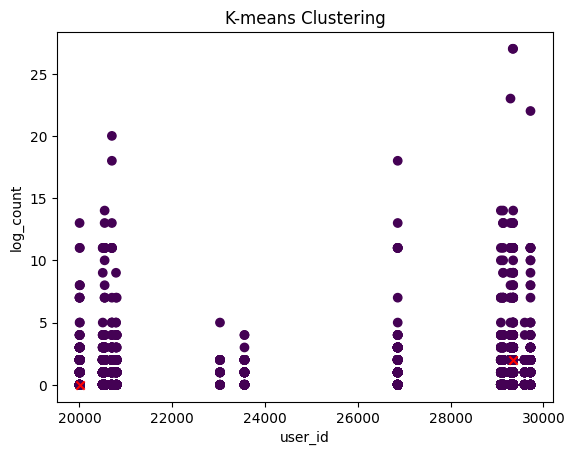

In [1]:
import pandas as pd
import torch
from torch import nn
import matplotlib.pyplot as plt

# Step 1: Read the Excel file
def read_excel(file_path):
    df = pd.read_excel(file_path)
    return df

# Step 2: Select specific columns (second and fourth columns)
def select_columns(df):
    df_selected = df.iloc[:, [1, 3]]
    return df_selected

# Step 3: Convert to PyTorch tensor
def df_to_tensor(df):
    data_tensor = torch.tensor(df.values, dtype=torch.float32)
    return data_tensor

# Step 4: Perform K-means clustering
def kmeans_clustering(data_tensor, num_clusters, num_iterations=100):
    # Randomly initialize cluster centers
    num_samples, num_features = data_tensor.size()
    centroids = data_tensor[torch.randperm(num_samples)[:num_clusters]]

    for i in range(num_iterations):
        # Compute distances from samples to centroids
        distances = torch.cdist(data_tensor, centroids)

        # Assign each sample to the closest centroid
        cluster_assignments = torch.argmin(distances, dim=1)

        # Update centroids
        new_centroids = torch.zeros_like(centroids)
        for k in range(num_clusters):
            cluster_points = data_tensor[cluster_assignments == k]
            if cluster_points.size(0) > 0:
                new_centroids[k] = cluster_points.mean(dim=0)
            else:
                new_centroids[k] = data_tensor[torch.randint(0, num_samples, (1,))]

        if torch.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, cluster_assignments

# Step 5: Plot results
def plot_clusters(data_tensor, cluster_assignments, centroids):
    plt.scatter(data_tensor[:, 0], data_tensor[:, 1], c=cluster_assignments, cmap='viridis', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
    plt.xlabel('user_id')
    plt.ylabel('log_count')
    plt.title('K-means Clustering')
    plt.show()

# Main function to perform the steps
def main(file_path, num_clusters):
    df = read_excel(file_path)
    df_selected = select_columns(df)
    data_tensor = df_to_tensor(df_selected)
    centroids, cluster_assignments = kmeans_clustering(data_tensor, num_clusters)
    plot_clusters(data_tensor, cluster_assignments, centroids)

# Example usage
file_path = '/content/logs_CAD_2024_1.xlsx'  #  file path
num_clusters = 3  #  the number of clusters
main(file_path, num_clusters)


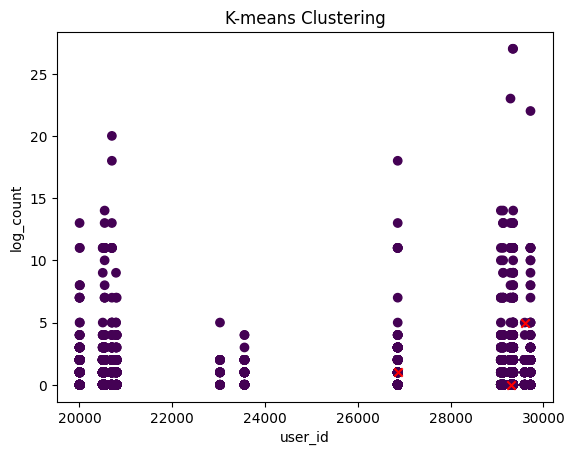

In [2]:
def read_excel(file_path):
    df = pd.read_excel(file_path)
    return df

# Step 2: Select specific columns (second and fourth columns)
def select_columns(df):
    df_selected = df.iloc[:, [1, 3]]
    return df_selected

# Step 3: Convert to PyTorch tensor
def df_to_tensor(df):
    data_tensor = torch.tensor(df.values, dtype=torch.float32)
    return data_tensor

# Step 4: Perform K-means clustering
def kmeans_clustering(data_tensor, num_clusters, num_iterations=100):
    # Randomly initialize cluster centers
    num_samples, num_features = data_tensor.size()
    centroids = data_tensor[torch.randperm(num_samples)[:num_clusters]]

    for i in range(num_iterations):
        # Compute distances from samples to centroids
        distances = torch.cdist(data_tensor, centroids)

        # Assign each sample to the closest centroid
        cluster_assignments = torch.argmin(distances, dim=1)

        # Update centroids
        new_centroids = torch.zeros_like(centroids)
        for k in range(num_clusters):
            cluster_points = data_tensor[cluster_assignments == k]
            if cluster_points.size(0) > 0:
                new_centroids[k] = cluster_points.mean(dim=0)
            else:
                new_centroids[k] = data_tensor[torch.randint(0, num_samples, (1,))]

        if torch.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, cluster_assignments

# Step 5: Plot results
def plot_clusters(data_tensor, cluster_assignments, centroids):
    plt.scatter(data_tensor[:, 0], data_tensor[:, 1], c=cluster_assignments, cmap='viridis', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
    plt.xlabel('user_id')
    plt.ylabel('log_count')
    plt.title('K-means Clustering')
    plt.show()

# Main function to perform the steps
def main(file_path, num_clusters):
    df = read_excel(file_path)
    df_selected = select_columns(df)
    data_tensor = df_to_tensor(df_selected)
    centroids, cluster_assignments = kmeans_clustering(data_tensor, num_clusters)
    plot_clusters(data_tensor, cluster_assignments, centroids)

# Example usage
file_path = '/content/logs_CAD_2024_1.xlsx'  #  file path
num_clusters = 4  #  the number of clusters
main(file_path, num_clusters)

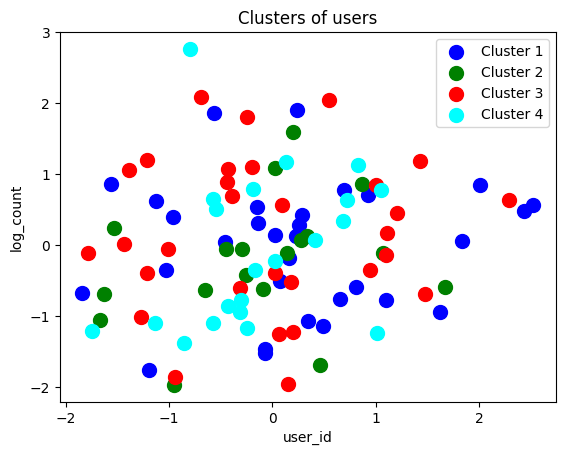

In [3]:
#visulaizing the clusters
import matplotlib.pyplot as plt # Import the matplotlib library and give it the alias plt

# Replace these with your actual data and cluster assignments
x = torch.randn(100, 2)  # Replace with your actual data
y_pred = torch.randint(0, 4, (100,)) # Replace with your actual cluster assignments

plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of users')
plt.xlabel('user_id')
plt.ylabel('log_count')
plt.legend()
plt.show()

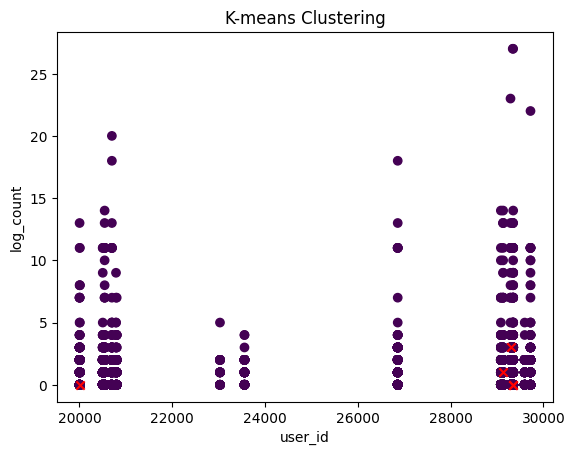

In [4]:
def read_excel(file_path):
    df = pd.read_excel(file_path)
    return df

# Step 2: Select specific columns (second and fourth columns)
def select_columns(df):
    df_selected = df.iloc[:, [1, 3]]
    return df_selected

# Step 3: Convert to PyTorch tensor
def df_to_tensor(df):
    data_tensor = torch.tensor(df.values, dtype=torch.float32)
    return data_tensor

# Step 4: Perform K-means clustering
def kmeans_clustering(data_tensor, num_clusters, num_iterations=100):
    # Randomly initialize cluster centers
    num_samples, num_features = data_tensor.size()
    centroids = data_tensor[torch.randperm(num_samples)[:num_clusters]]

    for i in range(num_iterations):
        # Compute distances from samples to centroids
        distances = torch.cdist(data_tensor, centroids)

        # Assign each sample to the closest centroid
        cluster_assignments = torch.argmin(distances, dim=1)

        # Update centroids
        new_centroids = torch.zeros_like(centroids)
        for k in range(num_clusters):
            cluster_points = data_tensor[cluster_assignments == k]
            if cluster_points.size(0) > 0:
                new_centroids[k] = cluster_points.mean(dim=0)
            else:
                new_centroids[k] = data_tensor[torch.randint(0, num_samples, (1,))]

        if torch.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, cluster_assignments

# Step 5: Plot results
def plot_clusters(data_tensor, cluster_assignments, centroids):
    plt.scatter(data_tensor[:, 0], data_tensor[:, 1], c=cluster_assignments, cmap='viridis', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
    plt.xlabel('user_id')
    plt.ylabel('log_count')
    plt.title('K-means Clustering')
    plt.show()

# Main function to perform the steps
def main(file_path, num_clusters):
    df = read_excel(file_path)
    df_selected = select_columns(df)
    data_tensor = df_to_tensor(df_selected)
    centroids, cluster_assignments = kmeans_clustering(data_tensor, num_clusters)
    plot_clusters(data_tensor, cluster_assignments, centroids)

# Example usage
file_path = '/content/logs_CAD_2024_1.xlsx'  #  file path
num_clusters = 6  #  the number of clusters
main(file_path, num_clusters)

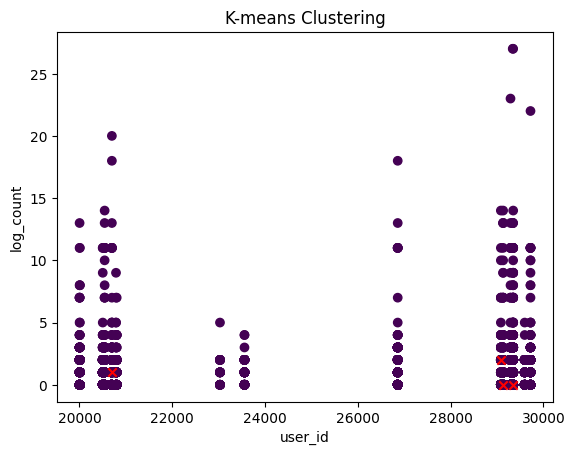

In [15]:
def read_excel(file_path):
    df = pd.read_excel(file_path)
    return df

# Step 2: Select specific columns (second and fourth columns)
def select_columns(df):
    df_selected = df.iloc[:, [1, 3]]
    return df_selected

# Step 3: Convert to PyTorch tensor
def df_to_tensor(df):
    data_tensor = torch.tensor(df.values, dtype=torch.float32)
    return data_tensor

# Step 4: Perform K-means clustering
def kmeans_clustering(data_tensor, num_clusters, num_iterations=100):
    # Randomly initialize cluster centers
    num_samples, num_features = data_tensor.size()
    centroids = data_tensor[torch.randperm(num_samples)[:num_clusters]]

    for i in range(num_iterations):
        # Compute distances from samples to centroids
        distances = torch.cdist(data_tensor, centroids)

        # Assign each sample to the closest centroid
        cluster_assignments = torch.argmin(distances, dim=1)

        # Update centroids
        new_centroids = torch.zeros_like(centroids)
        for k in range(num_clusters):
            cluster_points = data_tensor[cluster_assignments == k]
            if cluster_points.size(0) > 0:
                new_centroids[k] = cluster_points.mean(dim=0)
            else:
                new_centroids[k] = data_tensor[torch.randint(0, num_samples, (1,))]

        if torch.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, cluster_assignments

# Step 5: Plot results
def plot_clusters(data_tensor, cluster_assignments, centroids):
    plt.scatter(data_tensor[:, 0], data_tensor[:, 1], c=cluster_assignments, cmap='viridis', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
    plt.xlabel('user_id')
    plt.ylabel('log_count')
    plt.title('K-means Clustering')
    plt.show()

# Main function to perform the steps
def main(file_path, num_clusters):
    df = read_excel(file_path)
    df_selected = select_columns(df)
    data_tensor = df_to_tensor(df_selected)
    centroids, cluster_assignments = kmeans_clustering(data_tensor, num_clusters)
    plot_clusters(data_tensor, cluster_assignments, centroids)

# Example usage
file_path = '/content/logs_CAD_2024_1.xlsx'  #  file path
num_clusters = 5  #  the number of clusters
main(file_path, num_clusters)


In [19]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# Generate a sample dataset (you can replace this with your own dataset)
X, _ = make_blobs(n_samples=500, centers=5, cluster_std=1.0, random_state=42)

# Dictionary to store silhouette scores for each k
silhouette_scores = {}

# Loop over the range of clusters
for n_clusters in range(3, 7):
    # Initialize KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    # Fit the model to the data
    cluster_labels = kmeans.fit_predict(X)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Store the silhouette score
    silhouette_scores[n_clusters] = silhouette_avg

    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg}")

# Display the silhouette scores
print("\nSilhouette scores for different numbers of clusters:")
for n_clusters, score in silhouette_scores.items():
    print(f"n_clusters = {n_clusters}: {score}")



For n_clusters = 3, the silhouette score is 0.7083526015838516
For n_clusters = 4, the silhouette score is 0.7328381899726921
For n_clusters = 5, the silhouette score is 0.6786441315351273
For n_clusters = 6, the silhouette score is 0.6206046420197379

Silhouette scores for different numbers of clusters:
n_clusters = 3: 0.7083526015838516
n_clusters = 4: 0.7328381899726921
n_clusters = 5: 0.6786441315351273
n_clusters = 6: 0.6206046420197379


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
